In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
stats.expon(scale=12).cdf(10)

0.5654017914929218

In [5]:
1-stats.expon(scale=12).cdf(30)

0.08208499862389884

In [9]:
exp_dist=stats.expon(scale=12)
ex_dist=exp_dist.rvs(1000)

C:\Users\Srija\AppData\Local\Temp\ipykernel_9624\2860408844.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ex_dist,bins=25)


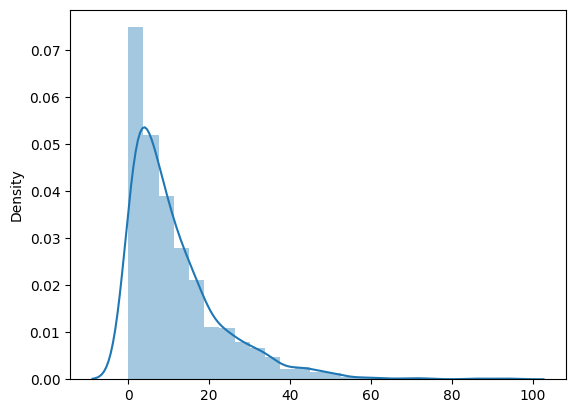

In [10]:
sns.distplot(ex_dist,bins=25)
plt.show()

In [11]:
#Now for Cumulative

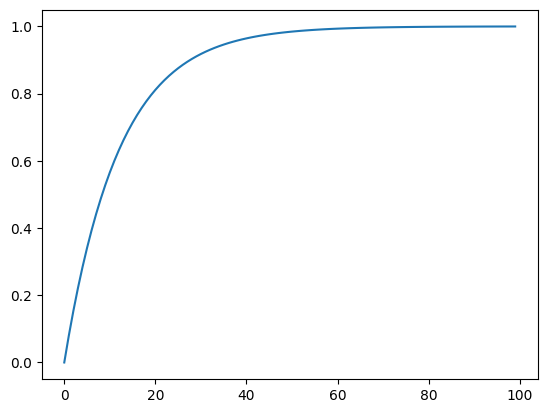

In [17]:
cdf=[]
for l in range(100):
    cdf.append(exp_dist.cdf(l))
plt.plot(cdf)

## Poisson's Distribution

In [18]:
emergency_data=pd.read_csv("911.csv")

In [19]:
emergency_data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [20]:
emergency_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [21]:
emergency_data["timeStamp"]=pd.to_datetime(emergency_data["timeStamp"])

In [22]:
def d_m_y(x):
    return f"{x.day}-{x.month}-{x.year}"

def hour(x):
    return x.hour

In [23]:
emergency_data['d_m_y']=emergency_data["timeStamp"].apply(d_m_y)
emergency_data["hour"]=emergecny_data["timeStamp"].apply(hour)

NameError: name 'emergecny_data' is not defined

In [24]:
emergency_data["hour"]=emergency_data["timeStamp"].apply(hour)

In [25]:
emergency_data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,d_m_y,hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,10-12-2015,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,10-12-2015,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,10-12-2015,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,10-12-2015,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,10-12-2015,17


In [26]:
#now we will aggreagate this data

In [27]:
groupby_date_and_hour=emergency_data.groupby(by=["d_m_y","hour"])

In [28]:
groupby_date_and_hour.get_group(name=('10-12-2015',17)).head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,d_m_y,hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,10-12-2015,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,10-12-2015,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,10-12-2015,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,10-12-2015,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,10-12-2015,17


In [29]:
CALLS=groupby_date_and_hour.count()['title'].reset_index()

In [30]:
CALLS

,d_m_y,hour,title
0,1-1-2016,0,18
1,1-1-2016,1,9
2,1-1-2016,2,16
3,1-1-2016,3,4
4,1-1-2016,4,5
...,...,...,...
6141,9-8-2016,19,23
6142,9-8-2016,20,10
6143,9-8-2016,21,15
6144,9-8-2016,22,7


In [31]:
#Now i have to do next level of aggregation

In [32]:
CALLS=pd.pivot_table(data=CALLS,values='title',index='d_m_y',columns='hour')

In [33]:
CALLS

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
d_m_y,,,,,,,,,,,,,,,,,,,,,
1-1-2016,18.0,9.0,16.0,4.0,5.0,4.0,5.0,8.0,8.0,7.0,...,16.0,12.0,7.0,18.0,16.0,16.0,9.0,10.0,9.0,12.0
1-2-2016,6.0,4.0,3.0,4.0,5.0,16.0,10.0,22.0,25.0,23.0,...,23.0,18.0,18.0,28.0,28.0,20.0,11.0,15.0,9.0,12.0
1-3-2016,5.0,5.0,2.0,1.0,3.0,6.0,12.0,16.0,27.0,19.0,...,23.0,32.0,32.0,27.0,22.0,13.0,14.0,12.0,13.0,6.0
1-4-2016,14.0,6.0,4.0,8.0,5.0,12.0,12.0,26.0,17.0,13.0,...,26.0,30.0,39.0,37.0,28.0,33.0,27.0,17.0,9.0,12.0
1-5-2016,11.0,5.0,11.0,7.0,4.0,8.0,6.0,6.0,10.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9-4-2016,6.0,4.0,12.0,7.0,6.0,5.0,4.0,7.0,6.0,13.0,...,23.0,28.0,18.0,16.0,17.0,9.0,11.0,12.0,7.0,2.0
9-5-2016,3.0,11.0,5.0,3.0,4.0,7.0,7.0,25.0,15.0,25.0,...,15.0,17.0,29.0,20.0,22.0,16.0,16.0,14.0,7.0,10.0
9-6-2016,6.0,6.0,4.0,5.0,4.0,7.0,12.0,26.0,24.0,13.0,...,34.0,25.0,38.0,40.0,28.0,14.0,5.0,18.0,7.0,10.0


In [34]:
#Ab humlog mwans calculate krenge but first lets look at the distribution of it 

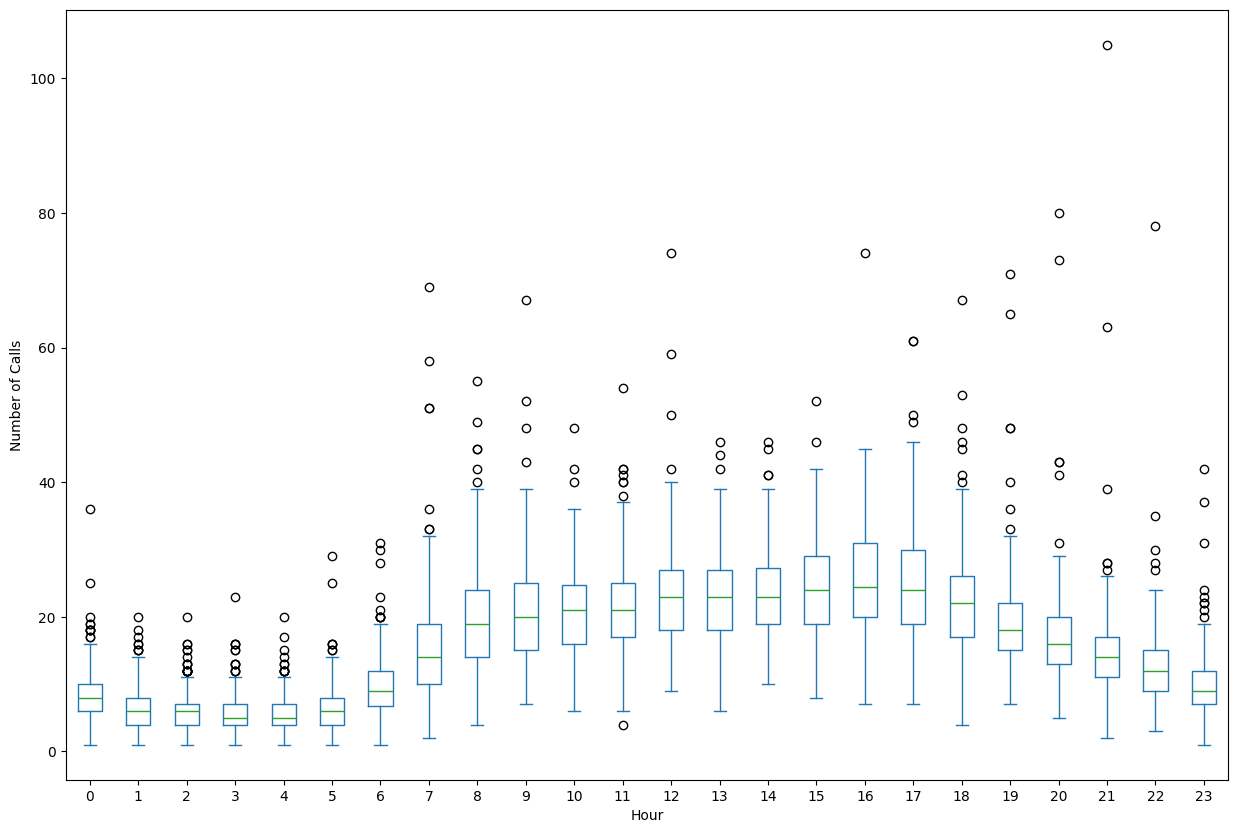

In [35]:
CALLS.plot.box(figsize=(15,10))
plt.xlabel('Hour')
plt.ylabel('Number of Calls')
plt.show()

In [36]:
mean_calls_per_hour=CALLS.mean().reset_index()
mean_calls_per_hour.columns=['hour','no_of_calls']

In [37]:
mean_calls_per_hour

,hour,no_of_calls
0,0,8.282353
1,1,6.775591
2,2,6.122530
3,3,5.605469
4,4,5.604743
5,5,6.363281
6,6,9.816406
7,7,15.447471
8,8,19.550388
9,9,20.596899


In [38]:
median_calls_per_hour=CALLS.median().reset_index()
median_calls_per_hour.columns=['hour','no_of_calls']

In [39]:
median_calls_per_hour

,hour,no_of_calls
0,0,8.0
1,1,6.0
2,2,6.0
3,3,5.0
4,4,5.0
5,5,6.0
6,6,9.0
7,7,14.0
8,8,19.0
9,9,20.0


In [40]:
CALLS.isna().sum()

hour
0     4
1     5
2     6
3     3
4     6
5     3
6     3
7     2
8     1
9     1
10    1
11    2
12    3
13    3
14    3
15    3
16    3
17    2
18    2
19    3
20    3
21    2
22    2
23    4
dtype: int64

In [42]:
CALLS.fillna(0,inplace=True)

In [43]:
#Now we are particulalry interestewd in finding the call recieved in 5pm that is 17th hour

In [44]:
calls_at_5pm=CALLS[17].values
calls_at_5pm

array([18., 28., 27., 37.,  0., 31., 26., 34., 33., 22., 24., 24., 17.,
       37., 23., 20., 20., 24., 35., 20., 21., 20., 30., 19., 39., 22.,
       22., 19., 16., 14., 26., 26., 18., 32., 23., 28., 19., 17., 18.,
       23., 35., 24., 49., 19., 26., 30., 21., 24., 17., 26., 34., 38.,
       21., 29., 32., 37., 24., 32.,  7., 26., 26., 23., 15., 32., 22.,
       16., 12., 36., 25., 19., 23., 15., 30., 20., 27., 24., 34., 31.,
       19., 22., 16., 46., 23., 23., 40., 28., 18., 15., 30., 19., 25.,
       25., 12., 19., 29., 18., 37., 37., 22., 27., 23., 27., 17., 37.,
       19., 26., 29., 13., 15., 16., 24., 29., 21., 15., 14., 28., 37.,
       20., 27., 29., 17., 27., 33., 24., 40., 36., 20., 16., 15., 11.,
       27., 21., 24., 61., 61., 23., 30., 23., 33., 35., 50., 28., 45.,
       25., 24., 23., 24., 13., 17., 19.,  0., 27., 22., 25., 20., 41.,
       35., 18., 30., 38., 12., 37., 19., 28., 33., 18., 26., 29., 24.,
       28.,  8., 21., 36., 16., 30., 19., 25., 15., 36., 31., 26

In [45]:
np.mean(calls_at_5pm)

25.16216216216216

In [58]:
np.std(calls_at_5pm)/np.sqrt(200)

0.6206732735768552

In [46]:
calls_at_5pm.shape

(259,)

In [47]:
#Now we will apply CLt on it means we are going torepeatedly sample from this datta and we will try to compute mea repeatdely and we are randomly going to picking 1000 (uske hisaab se uska shape 1754 aaya hai isliye) and we will do it ftill 1000 iteration

In [54]:
#-------------CLT-------------

mean_of_calls_at_5pm=[]

for i in range(200):
    mean=np.random.choice(calls_at_5pm,size=200).mean()
    mean_of_calls_at_5pm.append(mean)

In [55]:
means_of_calls_at_5pm=np.array(mean_of_calls_at_5pm)

C:\Users\Srija\AppData\Local\Temp\ipykernel_9624\3259505003.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mean_of_calls_at_5pm,bins=25)


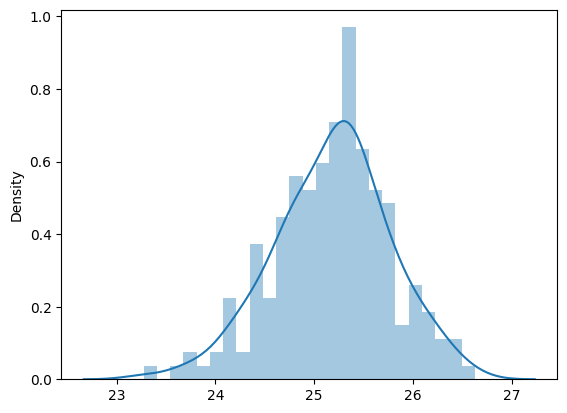

In [56]:
sns.distplot(mean_of_calls_at_5pm,bins=25)
plt.show()

In [57]:
np.mean(mean_of_calls_at_5pm)

25.180675

In [59]:
np.std(mean_of_calls_at_5pm)

0.5818259356328145

In [60]:
#Now we are calculating the confidence 

In [61]:
np.percentile(mean_of_calls_at_5pm,99.5)

26.445899999999998

In [62]:
poisson_distribution_hour_wise={}

In [65]:
for row in median_calls_per_hour.iterrows():
    poisson_distribution_hour_wise[int(row[1]['hour'])] = stats.poisson(mu=row[1]['no_of_calls'])


In [68]:
for hour in poisson_distribution_hour_wise:
    print("At Hour {},There is a 99.99% probability that ,less than {} calls will arrive".format(hour,poisson_distribution_hour_wise[hour].ppf(0.9999)))

At Hour 0,There is a 99.99% probability that ,less than 20.0 calls will arrive
At Hour 1,There is a 99.99% probability that ,less than 17.0 calls will arrive
At Hour 2,There is a 99.99% probability that ,less than 17.0 calls will arrive
At Hour 3,There is a 99.99% probability that ,less than 15.0 calls will arrive
At Hour 4,There is a 99.99% probability that ,less than 15.0 calls will arrive
At Hour 5,There is a 99.99% probability that ,less than 17.0 calls will arrive
At Hour 6,There is a 99.99% probability that ,less than 22.0 calls will arrive
At Hour 7,There is a 99.99% probability that ,less than 30.0 calls will arrive
At Hour 8,There is a 99.99% probability that ,less than 37.0 calls will arrive
At Hour 9,There is a 99.99% probability that ,less than 39.0 calls will arrive
At Hour 10,There is a 99.99% probability that ,less than 40.0 calls will arrive
At Hour 11,There is a 99.99% probability that ,less than 40.0 calls will arrive
At Hour 12,There is a 99.99% probability that ,les

## Geometric Distribution

In [71]:
geo_dist=stats.geom(p=0.08)

C:\Users\Srija\AppData\Local\Temp\ipykernel_9624\2810101134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a,bins=50)


<Axes: ylabel='Density'>

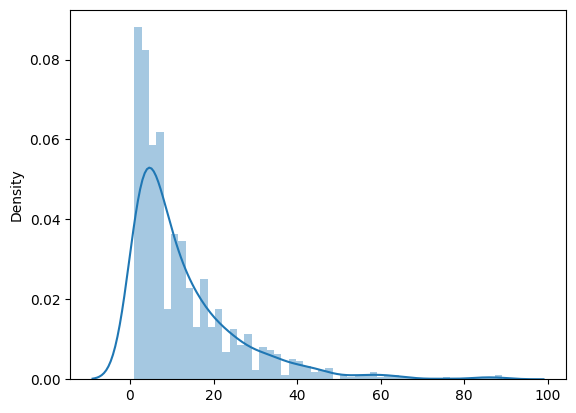

In [73]:
a=geo_dist.rvs(1000)
sns.distplot(a,bins=50)

In [74]:
geo_dist.pmf(10)

0.03777290906292455

In [76]:
geo_dist.pmf(3)*100

6.771200000000001

In [77]:
geo_dist.cdf(10)

0.5656115457763679

## Logarithmic Distribution

In [78]:
lognorm=stats.lognorm(s=1,loc=0,scale=5)

In [79]:
a=lognorm.pdf(np.arange(0,20,0.1))

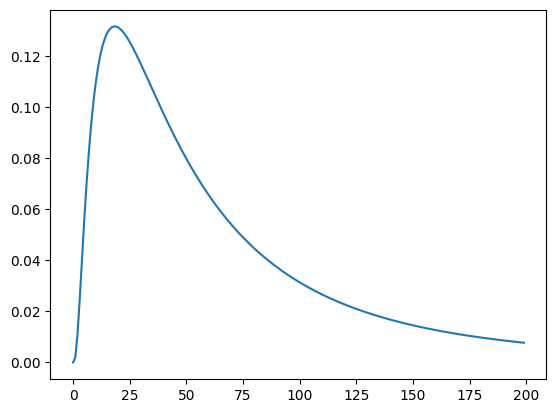

In [80]:
plt.plot(a)
plt.show()

## Pareto Distribution

In [81]:
#lets try to create some data

In [4]:
a=stats.pareto(1).pdf(np.arange(1,100,0.5))

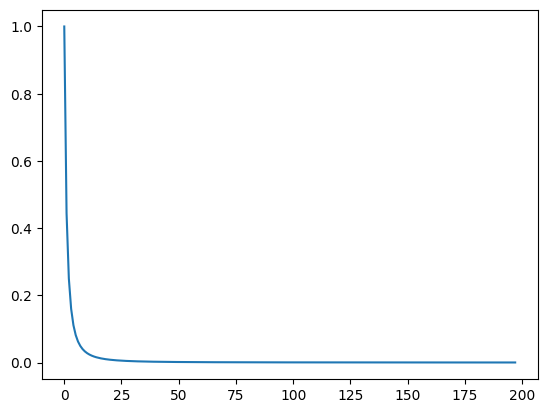

In [5]:
plt.plot(a)
plt.show()

In [6]:
a=np.linspace(start=1,stop=5,num=50)
a

array([1.        , 1.08163265, 1.16326531, 1.24489796, 1.32653061,
       1.40816327, 1.48979592, 1.57142857, 1.65306122, 1.73469388,
       1.81632653, 1.89795918, 1.97959184, 2.06122449, 2.14285714,
       2.2244898 , 2.30612245, 2.3877551 , 2.46938776, 2.55102041,
       2.63265306, 2.71428571, 2.79591837, 2.87755102, 2.95918367,
       3.04081633, 3.12244898, 3.20408163, 3.28571429, 3.36734694,
       3.44897959, 3.53061224, 3.6122449 , 3.69387755, 3.7755102 ,
       3.85714286, 3.93877551, 4.02040816, 4.10204082, 4.18367347,
       4.26530612, 4.34693878, 4.42857143, 4.51020408, 4.59183673,
       4.67346939, 4.75510204, 4.83673469, 4.91836735, 5.        ])

In [7]:
b=stats.pareto(a)

In [8]:
stats.pareto.cdf(b=2,x=np.linspace(1,5,50)) #It is cresating some value first it is converting that value in the pareto distribution

array([0.        , 0.14524742, 0.26100339, 0.35474335, 0.43171598,
       0.49569418, 0.54944643, 0.59504132, 0.63404969, 0.66768166,
       0.69688171, 0.72239565, 0.74481879, 0.76463092, 0.78222222,
       0.79791263, 0.81196648, 0.8246037 , 0.83600847, 0.846336  ,
       0.85571781, 0.86426593, 0.8720763 , 0.87923143, 0.88580262,
       0.89185172, 0.89743261, 0.9025924 , 0.9073724 , 0.911809  ,
       0.91593432, 0.91977681, 0.92336174, 0.92671164, 0.9298466 ,
       0.93278464, 0.93554189, 0.93813291, 0.94057078, 0.94286734,
       0.94503331, 0.9470784 , 0.94901145, 0.95084048, 0.95257284,
       0.95421521, 0.95577373, 0.957254  , 0.95866118, 0.96      ])

In [9]:
stats.pareto.cdf(b=2,x=1,scale=5)

0.0

In [10]:
a

array([1.        , 1.08163265, 1.16326531, 1.24489796, 1.32653061,
       1.40816327, 1.48979592, 1.57142857, 1.65306122, 1.73469388,
       1.81632653, 1.89795918, 1.97959184, 2.06122449, 2.14285714,
       2.2244898 , 2.30612245, 2.3877551 , 2.46938776, 2.55102041,
       2.63265306, 2.71428571, 2.79591837, 2.87755102, 2.95918367,
       3.04081633, 3.12244898, 3.20408163, 3.28571429, 3.36734694,
       3.44897959, 3.53061224, 3.6122449 , 3.69387755, 3.7755102 ,
       3.85714286, 3.93877551, 4.02040816, 4.10204082, 4.18367347,
       4.26530612, 4.34693878, 4.42857143, 4.51020408, 4.59183673,
       4.67346939, 4.75510204, 4.83673469, 4.91836735, 5.        ])

In [11]:
#Ab isko pareto sirtibution me change krte hai humlog 

In [14]:
b=stats.pareto(a)  
#I am trying to do what is the probability of that a hurricanne with intensity 4 hitting if it follows a pareto distribution

In [15]:
b.cdf()

TypeError: rv_frozen.cdf() missing 1 required positional argument: 'x'

In [16]:
stats.pareto.cdf(b=1,x=np.linspace(1,10,50))

array([0.        , 0.15517241, 0.26865672, 0.35526316, 0.42352941,
       0.4787234 , 0.52427184, 0.5625    , 0.59504132, 0.62307692,
       0.64748201, 0.66891892, 0.68789809, 0.70481928, 0.72      ,
       0.73369565, 0.74611399, 0.75742574, 0.76777251, 0.77727273,
       0.7860262 , 0.79411765, 0.80161943, 0.80859375, 0.81509434,
       0.82116788, 0.82685512, 0.83219178, 0.8372093 , 0.84193548,
       0.84639498, 0.85060976, 0.85459941, 0.8583815 , 0.86197183,
       0.86538462, 0.86863271, 0.87172775, 0.87468031, 0.8775    ,
       0.8801956 , 0.88277512, 0.8852459 , 0.88761468, 0.88988764,
       0.89207048, 0.89416847, 0.89618644, 0.8981289 , 0.9       ])

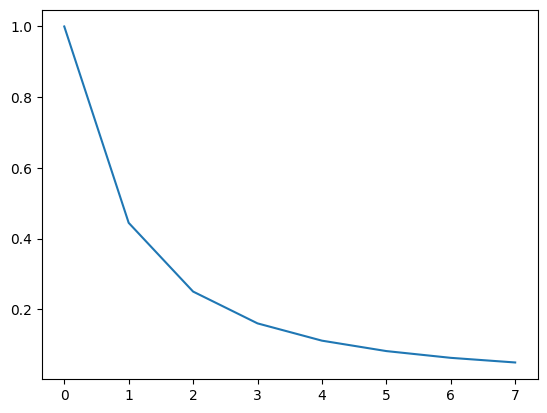

In [20]:
a=stats.pareto(1).pdf(np.arange(1,5,0.5))
plt.plot(a)
plt.show()

In [21]:
stats.pareto(1).pdf(4)*100

6.25

In [22]:
stats.pareto(1).pdf(5)*100

4.0

In [23]:
stats.pareto(1).cdf(3)*100

66.66666666666667